1. Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.

2. Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using tf.keras.applications.efficientnet_v2.EfficientNetV2B0 as the base model. Use the ModelCheckpoint callback to save the weights to file.

---

In [1]:
import datetime
datetime.datetime.now()

datetime.datetime(2023, 9, 8, 23, 15, 42, 596056)

In [2]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2023-09-08 23:15:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-09-08 23:15:42 (102 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-09-08 23:15:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   177MB/s    in 0.9s    

2023-09-08 23:15:49 (177 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
# unzip dataset
unzip_data('/content/10_food_classes_10_percent.zip')

In [5]:
# Walking through dataset
walk_through_dir('/content/10_food_classes_10_percent')

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '/content/10_food_classes_10_

In [6]:
# Creating training and test directories.
train_dir = '/content/10_food_classes_10_percent/train'
test_dir = '/content/10_food_classes_10_percent/test'

In [7]:
import tensorflow as tf
IMG_SIZE=(224, 224)

#Create data inputs
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 image_size=IMG_SIZE,
                                                                 batch_size=32,
                                                                 label_mode = 'categorical')

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [9]:
for images, labels in train_data.take(1):
  print(images, labels)

tf.Tensor(
[[[[  4.          5.          0.       ]
   [  4.          5.          0.       ]
   [  4.          5.          0.       ]
   ...
   [  1.          1.          1.       ]
   [  1.          1.          1.       ]
   [  1.          1.          1.       ]]

  [[  4.          5.          0.       ]
   [  4.          5.          0.       ]
   [  4.          5.          0.       ]
   ...
   [  1.          1.          1.       ]
   [  1.          1.          1.       ]
   [  1.          1.          1.       ]]

  [[  4.          5.          0.       ]
   [  4.          5.          0.       ]
   [  4.          5.          0.       ]
   ...
   [  1.          1.          1.       ]
   [  1.          1.          1.       ]
   [  1.          1.          1.       ]]

  ...

  [[182.92346   182.92346   184.92346  ]
   [183.72958   183.72958   185.72958  ]
   [184.7857    184.7857    186.7857   ]
   ...
   [210.61742   212.1123    211.44897  ]
   [203.58665   203.34175   200.69887  ]
   [1

In [10]:
images[0]

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[  4.      ,   5.      ,   0.      ],
        [  4.      ,   5.      ,   0.      ],
        [  4.      ,   5.      ,   0.      ],
        ...,
        [  1.      ,   1.      ,   1.      ],
        [  1.      ,   1.      ,   1.      ],
        [  1.      ,   1.      ,   1.      ]],

       [[  4.      ,   5.      ,   0.      ],
        [  4.      ,   5.      ,   0.      ],
        [  4.      ,   5.      ,   0.      ],
        ...,
        [  1.      ,   1.      ,   1.      ],
        [  1.      ,   1.      ,   1.      ],
        [  1.      ,   1.      ,   1.      ]],

       [[  4.      ,   5.      ,   0.      ],
        [  4.      ,   5.      ,   0.      ],
        [  4.      ,   5.      ,   0.      ],
        ...,
        [  1.      ,   1.      ,   1.      ],
        [  1.      ,   1.      ,   1.      ],
        [  1.      ,   1.      ,   1.      ]],

       ...,

       [[182.92346 , 182.92346 , 184.92346 ],
        [183.

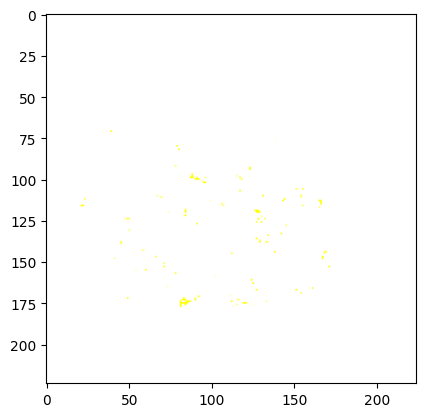

In [11]:
import matplotlib.pyplot as plt
plt.imshow(images[21])

In [40]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# OLD
# base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. If using ResNet50V2, add this to speed up convergence, remove for EfficientNetV2
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNetV2 inputs don't have to be normalized)
x = base_model(inputs)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 10. Fit the model (we use less steps for validation so it's faster)
history_model_0 = model_0.fit(train_data,
                                 epochs=10,
                                 steps_per_epoch=len(train_data),
                                 validation_data=test_data,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=int(0.25 * len(test_data)),
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback("transfer_learning", "model_0")])

Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: transfer_learning/model_0/20230909-012414
Epoch 1/10
24/24 [==============================] - 13s 229ms/step - loss: 1.8646 - accuracy: 0.4373 - val_loss: 1.3051 - val_accuracy: 0.7105
Epoch 2/10
24/24 [==============================] - 3s 121ms/step - loss: 1.1380 - accuracy: 0.7413 - val_loss: 0.9105 - val_accuracy: 0.7681
Epoch 3/10
24/24 [==============================] - 4s 148ms/step - loss: 0.8313 - accuracy: 0.8187 - val_loss: 0.7319 - val_accuracy: 0.8141
Epoch 4/10
24/24 [==============================] - 4s 170ms/step - loss: 0.6839 - accuracy: 0.8560 - val_loss: 0.6286 - val_accuracy: 0.8372
Epoch 5/10
24/24 [==============================] - 4s 169ms/step - loss: 0.5805 - accuracy: 0.8693 - val_loss: 0.5873 - val_accuracy: 0.8438
Epoch 6/10
24/24 [==============================] - 4s 169ms/step - loss: 0.5177 - accuracy: 0.8787 - val_loss: 0.5454 - val_a

In [13]:
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['normalizatio

1/1 [==============================] - 3s 3s/step


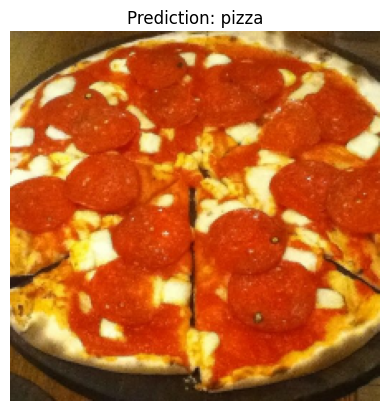

In [14]:
from helper_functions import pred_and_plot
pred_and_plot(model_0, '/content/10_food_classes_10_percent/test/pizza/1060407.jpg', train_data.class_names)

1/1 [==============================] - 0s 27ms/step


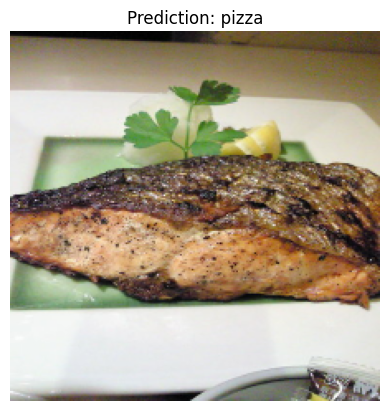

In [15]:
pred_and_plot(model_0, '/content/10_food_classes_10_percent/test/grilled_salmon/1570406.jpg', train_data.class_names)

1/1 [==============================] - 2s 2s/step


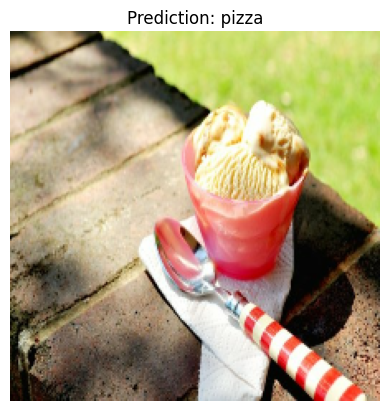

In [42]:
pred_and_plot(model_0, '/content/10_food_classes_10_percent/test/ice_cream/1161150.jpg', train_data.class_names)

<Axes: >

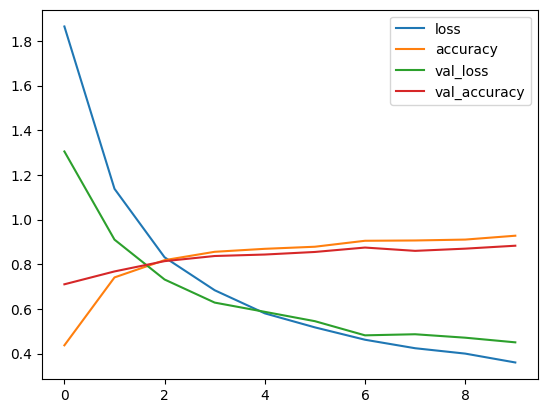

In [41]:
import pandas as pd
pd.DataFrame(history_model_0.history).plot()

In [18]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [19]:
for num_layer, layer in enumerate(base_model.layers):
  print(num_layer, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 block

In [20]:
# Data_Augmentation
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
])

In [21]:
data_augmentation

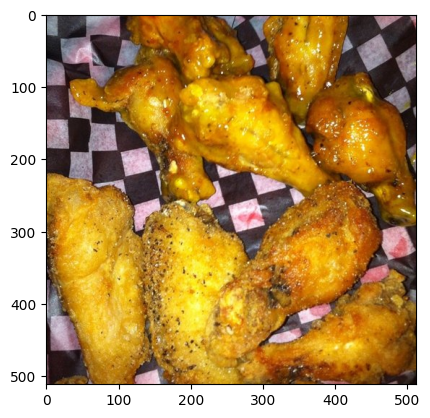

In [22]:
import random
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

target_class = random.choice(train_data.class_names)
target_dir = '/content/10_food_classes_10_percent/train/' + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir+'/'+random_image
img = mpimg.imread(random_image_path)
#plt.imshow(random_image_path) # TypeError: Image data of dtype <U59 cannot be converted to float
plt.imshow(img)

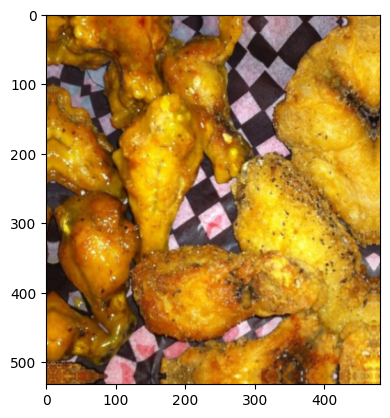

In [23]:
aug_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.imshow(tf.squeeze(aug_img)/255.)

In [27]:
#Setup checkpoint path
checkpoint_path = 'model_checkpoint_weights/checkpoint.ckpt'
#Create ModelCheckpoint Callbacks
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         save_freq='epoch')

In [29]:
from keras.api._v2.keras.layers import GlobalAveragePooling2D
input_shape = (224, 224, 3)

# basemodel
base_model_1 = tf.keras.applications.EfficientNetB0(include_top=False)
# Freeze the basemodel
base_model_1.trainable=False

# Create Functional Model
inputs = layers.Input(shape=input_shape, name='input_layer')
# Augmented Data
x = data_augmentation(inputs)

# input pass to basemodel
x = base_model_1(inputs, training=False)
#Pooling
x = layers.GlobalAveragePooling2D(name='pooling_layer')(x)
# Dense layer
outputs = layers.Dense(len(train_data.class_names),activation='softmax', name='output_layer')(x)
# combined
model_1 = tf.keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
initial_epochs=5
history_model_1 = model_1.fit(train_data,
                              epochs=initial_epochs,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=len(test_data),
                              callbacks=[create_tensorboard_callback('10_percent_data', 'model_1'), checkpoint_callback])

Saving TensorBoard log files to: 10_percent_data/model_1/20230909-004722
Epoch 1/5
24/24 [==============================] - 17s 423ms/step - loss: 1.8294 - accuracy: 0.4333 - val_loss: 1.2671 - val_accuracy: 0.7404
Epoch 2/5
24/24 [==============================] - 8s 313ms/step - loss: 1.0335 - accuracy: 0.7813 - val_loss: 0.8481 - val_accuracy: 0.8256
Epoch 3/5
24/24 [==============================] - 8s 312ms/step - loss: 0.7387 - accuracy: 0.8280 - val_loss: 0.6881 - val_accuracy: 0.8464
Epoch 4/5
24/24 [==============================] - 8s 310ms/step - loss: 0.5954 - accuracy: 0.8653 - val_loss: 0.6033 - val_accuracy: 0.8564
Epoch 5/5
24/24 [==============================] - 9s 381ms/step - loss: 0.5040 - accuracy: 0.8947 - val_loss: 0.5503 - val_accuracy: 0.8668


<Axes: >

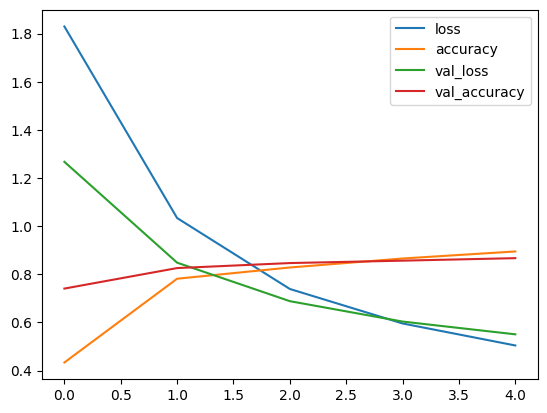

In [30]:
import pandas as pd
pd.DataFrame(history_model_1.history).plot()

In [31]:
model_1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


In [33]:
for layer_num, layer in enumerate(base_model_1.layers):
  print(layer_num, layer.name, layer.trainable)

0 input_4 False
1 rescaling_5 False
2 normalization_3 False
3 rescaling_6 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [34]:
base_model_1.trainable=True

In [35]:
for layer in base_model_1.layers[:-10]:
  layer.trainable=False

In [36]:
for layer_num, layer in enumerate(base_model_1.layers):
  print(layer_num, layer.name, layer.trainable)

0 input_4 False
1 rescaling_5 False
2 normalization_3 False
3 rescaling_6 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [37]:
# Compile the model
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=['accuracy'])

# Fit the model
finetuning_epochs=initial_epochs + 5
history_model_1 = model_1.fit(train_data,
                              epochs=finetuning_epochs,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              initial_epoch=history_model_1.epoch[-1], # start from previous last epoch
                              validation_steps=len(test_data),
                              callbacks=[create_tensorboard_callback('10_percent_data', 'model_1'), checkpoint_callback])

Saving TensorBoard log files to: 10_percent_data/model_1/20230909-011708
Epoch 5/10
24/24 [==============================] - 25s 599ms/step - loss: 0.4837 - accuracy: 0.8507 - val_loss: 0.4839 - val_accuracy: 0.8364
Epoch 6/10
24/24 [==============================] - 13s 534ms/step - loss: 0.1715 - accuracy: 0.9453 - val_loss: 0.3853 - val_accuracy: 0.8720
Epoch 7/10
24/24 [==============================] - 12s 514ms/step - loss: 0.0507 - accuracy: 0.9893 - val_loss: 0.3947 - val_accuracy: 0.8760
Epoch 8/10
24/24 [==============================] - 12s 516ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.4041 - val_accuracy: 0.8772
Epoch 9/10
24/24 [==============================] - 8s 315ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.4110 - val_accuracy: 0.8808
Epoch 10/10
24/24 [==============================] - 8s 335ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.4165 - val_accuracy: 0.8880


In [38]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.4266666769981384, 0.7773333191871643, 0.8040000200271606, 0.843999981880188, 0.8586666584014893, 0.8506666421890259, 0.9453333616256714, 0.9893333315849304, 1.0, 1.0, 1.0]


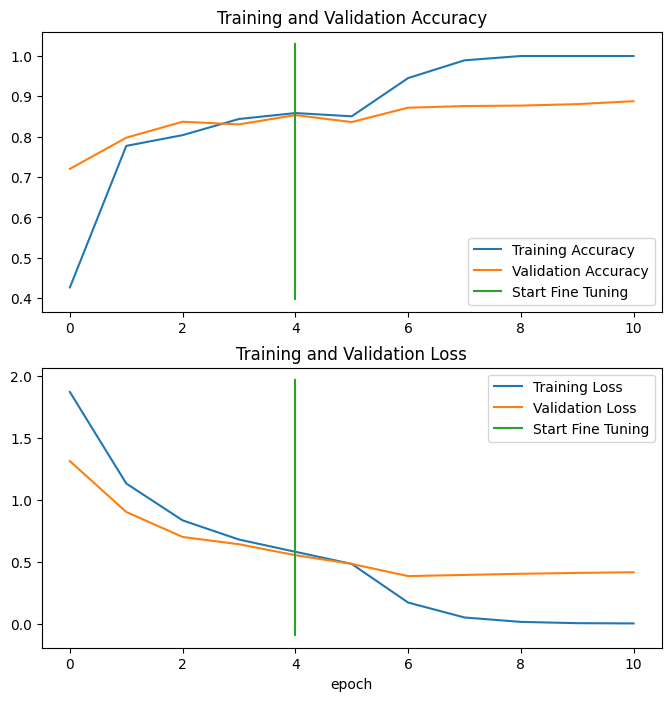

In [39]:
compare_historys(original_history=history_model_0,
                 new_history=history_model_1,
                 initial_epochs=5)

In [44]:
base_model_1.trainable=True
for layer in base_model_1.layers[:-30]:
  layer.trainable=False

for layer_num, layer in enumerate(base_model_1.layers):
  print(layer_num, layer.name, layer.trainable)

0 input_4 False
1 rescaling_5 False
2 normalization_3 False
3 rescaling_6 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [46]:
# Compile the model
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.00001),
                metrics=['accuracy'])

# Fit the model
finetuning_epochs=initial_epochs + 10
history_model_1_30_layer = model_1.fit(train_data,
                              epochs=finetuning_epochs,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              initial_epoch=history_model_1.epoch[-1], # start from previous last epoch
                              validation_steps=len(test_data),
                              callbacks=[create_tensorboard_callback('10_percent_data', 'model_1'), checkpoint_callback])

Saving TensorBoard log files to: 10_percent_data/model_1/20230909-013852
Epoch 10/15
24/24 [==============================] - 25s 584ms/step - loss: 0.0470 - accuracy: 0.9813 - val_loss: 0.7538 - val_accuracy: 0.8360
Epoch 11/15
24/24 [==============================] - 8s 323ms/step - loss: 0.0313 - accuracy: 0.9880 - val_loss: 0.7227 - val_accuracy: 0.8464
Epoch 12/15
24/24 [==============================] - 8s 309ms/step - loss: 0.0280 - accuracy: 0.9893 - val_loss: 0.7549 - val_accuracy: 0.8356
Epoch 13/15
24/24 [==============================] - 9s 365ms/step - loss: 0.0207 - accuracy: 0.9920 - val_loss: 0.6788 - val_accuracy: 0.8568
Epoch 14/15
24/24 [==============================] - 8s 346ms/step - loss: 0.0442 - accuracy: 0.9880 - val_loss: 0.6121 - val_accuracy: 0.8456
Epoch 15/15
24/24 [==============================] - 8s 313ms/step - loss: 0.0227 - accuracy: 0.9920 - val_loss: 0.7282 - val_accuracy: 0.8448


10
16
[0.437333345413208, 0.7413333058357239, 0.8186666369438171, 0.8560000061988831, 0.8693333268165588, 0.8786666393280029, 0.9053333401679993, 0.9066666960716248, 0.9106666445732117, 0.9279999732971191, 0.981333315372467, 0.9879999756813049, 0.9893333315849304, 0.9919999837875366, 0.9879999756813049, 0.9919999837875366]


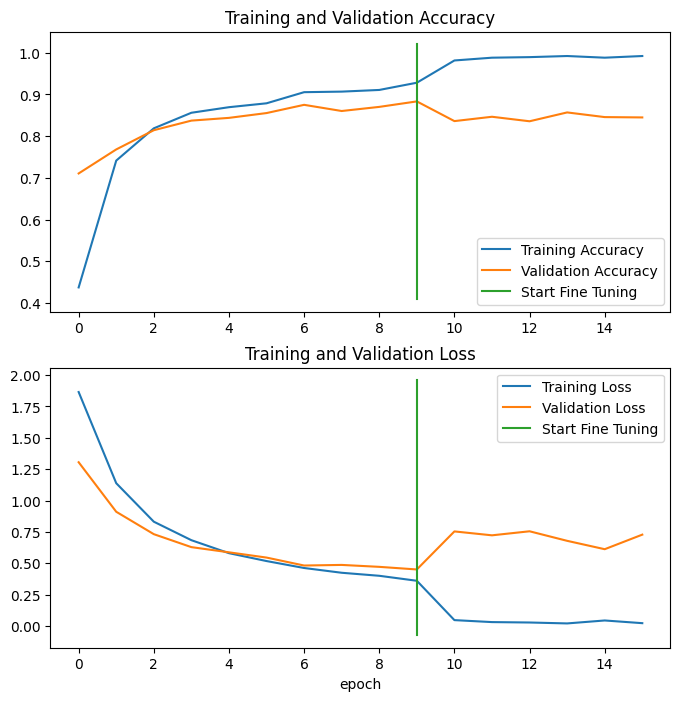

In [49]:
compare_historys(original_history=history_model_0,
                 new_history=history_model_1_30_layer,
                 initial_epochs=10)